<a href="https://colab.research.google.com/github/priyanka2224/Measurement_Tutorial/blob/main/MeasurementTutorial_PPaul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Measurement Tutorial: SoDA 501 SP25**

In this tutorial we will epxlore various code examples to undertsand some key aspects on Measurement. The measurement scale used here is the Perceived Discrimination Scale developed by Williams et al. (1997). This scale is used to assess how frequently individuals feel being treated poorly or unfairly due to their race, ethnicity, gender, age, religion, physical appearance, sexual orientation, or other persoanlity traits.

The Midlife in the United States (MIDUS) has retained the original version of this scale without modifcation. MIDUS 3 (cross-sectional data) will be used here for demonstration purposes. Here's the link for curious cats: https://www.midus.wisc.edu/

**First Install Packages**

In [ ]:
!pip install pyreadr #
!pip install missingno

In [ ]:
import pandas as pd
import pyreadr
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno

In [ ]:
#First lets load the .rda file
midus = pyreadr.read_r('36346-0001-Data.rda')

In [ ]:
#Lets get the list of objects loaded
midus_loaded = list(midus.keys())

In [ ]:
# Lets see whats in the dataframe and print
# But first lets check if it's a dataframe
type(midus["da36346.0001"])

pandas.core.frame.DataFrame

In [ ]:
# One way out
df = midus[midus_loaded[0]]
print(df.head())

      M2ID  M2FAMNUM       SAMPLMAJ  \
0  10001.0  110498.0   (02) SIBLING   
1  10002.0  100001.0  (01) MAIN RDD   
2  10011.0  110475.0   (02) SIBLING   
3  10015.0  120805.0      (03) TWIN   
4  10019.0  100009.0  (01) MAIN RDD   

                                     C1STATUS    M3RE_FILTER  C1PRAGE  \
0  (4) COMPLETED M3 CATI AND SAQ PART 1 AND 2  (0) M3 SAMPLE     69.0   
1                  (1) COMPLETED M3 CATI ONLY  (0) M3 SAMPLE     78.0   
2  (4) COMPLETED M3 CATI AND SAQ PART 1 AND 2  (0) M3 SAMPLE     61.0   
3  (4) COMPLETED M3 CATI AND SAQ PART 1 AND 2  (0) M3 SAMPLE     63.0   
4  (4) COMPLETED M3 CATI AND SAQ PART 1 AND 2  (0) M3 SAMPLE     60.0   

   C1PBYEAR     C1PRSEX  C1PIDATE_MO  C1PIDATE_YR  ...   C1SP4L  C1SP4M  \
0    1943.0    (1) MALE          7.0  (2013) 2013  ...      NaN     NaN   
1    1935.0    (1) MALE          6.0  (2013) 2013  ...      NaN     NaN   
2    1952.0  (2) FEMALE          6.0  (2013) 2013  ...  (1) YES  (2) NO   
3    1950.0  (2) FEMALE   

In [ ]:
# What if we simply print?
print(midus.keys())

odict_keys(['da36346.0001'])


In [ ]:
# so we extract the object as a Pandas dataframe : Another way to see whats in there
dfpd= midus["da36346.0001"]
print(dfpd.head())

      M2ID  M2FAMNUM       SAMPLMAJ  \
0  10001.0  110498.0   (02) SIBLING   
1  10002.0  100001.0  (01) MAIN RDD   
2  10011.0  110475.0   (02) SIBLING   
3  10015.0  120805.0      (03) TWIN   
4  10019.0  100009.0  (01) MAIN RDD   

                                     C1STATUS    M3RE_FILTER  C1PRAGE  \
0  (4) COMPLETED M3 CATI AND SAQ PART 1 AND 2  (0) M3 SAMPLE     69.0   
1                  (1) COMPLETED M3 CATI ONLY  (0) M3 SAMPLE     78.0   
2  (4) COMPLETED M3 CATI AND SAQ PART 1 AND 2  (0) M3 SAMPLE     61.0   
3  (4) COMPLETED M3 CATI AND SAQ PART 1 AND 2  (0) M3 SAMPLE     63.0   
4  (4) COMPLETED M3 CATI AND SAQ PART 1 AND 2  (0) M3 SAMPLE     60.0   

   C1PBYEAR     C1PRSEX  C1PIDATE_MO  C1PIDATE_YR  ...   C1SP4L  C1SP4M  \
0    1943.0    (1) MALE          7.0  (2013) 2013  ...      NaN     NaN   
1    1935.0    (1) MALE          6.0  (2013) 2013  ...      NaN     NaN   
2    1952.0  (2) FEMALE          6.0  (2013) 2013  ...  (1) YES  (2) NO   
3    1950.0  (2) FEMALE   

**Codes required to subset: items of the scale and group factors**

M2ID [MIDUS 2 ID number]

C1PRAGE [Respondent's calculated age at MIDUS 3 Project 1 phone interview]

C1PRSEX [Respondent's sex; 1: male, 2: female]

**PERCEIVED DISCRIMINATION SCALE**

C1SLFEDI [Life Discrimination Subscale; range of score is 0-11 since there are
11 items, "The scale is a count of the type of discrimination experienced across
the 11 items"; -1 means respondent does not have SAQ data, 98 means missing
data]

**Items** ["Each item is answered by frequency (\# of times) of its happening"]

C1SP1A: Higher education discouraged (times/ count)

C1SP1B: Denied scholarship
(times)

C1SP1C: Not hired for a job (times)

C1SP1D: Not given job promotion
(times)

C1SP1E: Fired (times)

C1SP1F: Prevented from rent/buying home (times)

C1SP1G: Prevented remain in neighborhood (times)

C1SP1H: Hassled by police
(times)

C1SP1I: Denied a bank loan (times)

C1SP1J: Denied or provided inferior
medical care (times)

C1SP1K: Denied or provided inferior service (times)

C1SDAYDI [Daily Discrimination; "The scale is constructed by calculating the sum
of the values of the items. Items were reverse-coded so that high scores reflect
higher standing in the scale"]

**Items** [1: often, 2: sometimes, 3: rarely, 4: never ; -1: respondent does not
have SAQ data, 8: refused]

C1SP2A: Treated with less courtesy than others (frequency)

C1SP2B: Treated with
less respect than others (frequency)

C1SP2C: Receive poorer service than others
(frequency)

C1SP2D: People think you are not smart (frequency)

C1SP2E: People
act afraid of you (frequency)

C1SP2F: People think you are dishonest (frequency)

C1SP2G: People think you not as good as they are (frequency)

C1SP2H: Called
names or insulted (frequency)

C1SP2I: Threatened/harassed (frequency)

98 and -1 means Missing Data for Daily Discrimination items

**Additional code for Describing the Sample**

C1PB19 [Marital status currently; 1: married, 2: separated, 3: divorced, 4: widowed, 5:
never married ; 7: don't know, 8: refused]

In [ ]:
# Define the desired columns
desired_columns = [
    'M2ID', 'C1PRAGE', 'C1PRSEX', 'C1SLFEDI', 'C1SP1A', 'C1SP1B', 'C1SP1C', 'C1SP1D', 'C1SP1E', 'C1SP1F',
    'C1SP1G', 'C1SP1H', 'C1SP1I', 'C1SP1J', 'C1SP1K', 'C1SDAYDI', 'C1SP2A', 'C1SP2B', 'C1SP2C', 'C1SP2D',
    'C1SP2E', 'C1SP2F', 'C1SP2G', 'C1SP2H', 'C1SP2I', 'C1PB19'
]

# Find existing columns in df
existing_columns = [col for col in desired_columns if col in df.columns]

# Select only the existing columns
df_required = df[existing_columns]

# Print
print(df_required.head())


      M2ID  C1PRAGE     C1PRSEX  C1SLFEDI  C1SP1A  C1SP1B  C1SP1C  C1SP1D  \
0  10001.0     69.0    (1) MALE       0.0     0.0     0.0     0.0     0.0   
1  10002.0     78.0    (1) MALE       NaN     NaN     NaN     NaN     NaN   
2  10011.0     61.0  (2) FEMALE       1.0     2.0     0.0     0.0     0.0   
3  10015.0     63.0  (2) FEMALE       2.0     0.0     0.0     1.0     1.0   
4  10019.0     60.0    (1) MALE       0.0     0.0     0.0     0.0     0.0   

   C1SP1E  C1SP1F  ...      C1SP2A      C1SP2B      C1SP2C      C1SP2D  \
0     0.0     0.0  ...   (4) NEVER   (4) NEVER   (4) NEVER   (4) NEVER   
1     NaN     NaN  ...         NaN         NaN         NaN         NaN   
2     0.0     0.0  ...  (3) RARELY  (3) RARELY   (4) NEVER  (3) RARELY   
3     0.0     0.0  ...   (4) NEVER   (4) NEVER   (4) NEVER   (4) NEVER   
4     0.0     0.0  ...  (3) RARELY  (3) RARELY  (3) RARELY  (3) RARELY   

       C1SP2E      C1SP2F         C1SP2G      C1SP2H      C1SP2I        C1PB19  
0  (3) RARE

In [ ]:
# Let me rename the columns for my convenience
df_required = df_required.rename(columns={
    'M2ID': 'id',
    'C1PRAGE': 'age',
    'C1PRSEX': 'sex',
    'C1SLFEDI': 'life.dis',
    'C1SP1A': 'lifdis.a',
    'C1SP1B': 'lifdis.b',
    'C1SP1C': 'lifdis.c',
    'C1SP1D': 'lifdis.d',
    'C1SP1E': 'lifdis.e',
    'C1SP1F': 'lifdis.f',
    'C1SP1G': 'lifdis.g',
    'C1SP1H': 'lifdis.h',
    'C1SP1I': 'lifdis.i',
    'C1SP1J': 'lifdis.j',
    'C1SP1K': 'lifdis.k',
    'C1SDAYDI': 'daily.dis',
    'C1SP2A': 'dlydis.a',
    'C1SP2B': 'dlydis.b',
    'C1SP2C': 'dlydis.c',
    'C1SP2D': 'dlydis.d',
    'C1SP2E': 'dlydis.e',
    'C1SP2F': 'dlydis.f',
    'C1SP2G': 'dlydis.g',
    'C1SP2H': 'dlydis.h',
    'C1SP2I': 'dlydis.i',
    'C1PB19': 'marital'
})

# Print and check
df_required.head()


,id,age,sex,life.dis,lifdis.a,lifdis.b,lifdis.c,lifdis.d,lifdis.e,lifdis.f,...,dlydis.a,dlydis.b,dlydis.c,dlydis.d,dlydis.e,dlydis.f,dlydis.g,dlydis.h,dlydis.i,marital
0,10001.0,69.0,(1) MALE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(3) RARELY,(4) NEVER,(3) RARELY,(4) NEVER,(4) NEVER,(3) DIVORCED
1,10002.0,78.0,(1) MALE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(1) MARRIED
2,10011.0,61.0,(2) FEMALE,1.0,2.0,0.0,0.0,0.0,0.0,0.0,...,(3) RARELY,(3) RARELY,(4) NEVER,(3) RARELY,(3) RARELY,(3) RARELY,(3) RARELY,(4) NEVER,(4) NEVER,(3) DIVORCED
3,10015.0,63.0,(2) FEMALE,2.0,0.0,0.0,1.0,1.0,0.0,0.0,...,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(1) MARRIED
4,10019.0,60.0,(1) MALE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,(3) RARELY,(3) RARELY,(3) RARELY,(3) RARELY,(3) RARELY,(3) RARELY,(2) SOMETIMES,(3) RARELY,(3) RARELY,(1) MARRIED


In [ ]:
# Checking for missing values
missing_values = df_required.isnull()

print(missing_values)

         id    age    sex  life.dis  lifdis.a  lifdis.b  lifdis.c  lifdis.d  \
0     False  False  False     False     False     False     False     False   
1     False  False  False      True      True      True      True      True   
2     False  False  False     False     False     False     False     False   
3     False  False  False     False     False     False     False     False   
4     False  False  False     False     False     False     False     False   
...     ...    ...    ...       ...       ...       ...       ...       ...   
3289  False  False  False     False     False     False     False     False   
3290  False  False  False     False     False     False     False     False   
3291  False  False  False      True      True      True      True      True   
3292  False  False  False     False     False     False     False     False   
3293  False  False  False     False     False     False     False     False   

      lifdis.e  lifdis.f  ...  dlydis.a  dlydis.b  

In [ ]:
# Checking for non-missing values using notnull()
non_missing_values = df_required.notnull()

non_missing_values

,id,age,sex,life.dis,lifdis.a,lifdis.b,lifdis.c,lifdis.d,lifdis.e,lifdis.f,...,dlydis.a,dlydis.b,dlydis.c,dlydis.d,dlydis.e,dlydis.f,dlydis.g,dlydis.h,dlydis.i,marital
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3289,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3290,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3291,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3292,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [ ]:
# Checking random 10 data to see any missing values

df_required.sample(10)

,id,age,sex,life.dis,lifdis.a,lifdis.b,lifdis.c,lifdis.d,lifdis.e,lifdis.f,...,dlydis.a,dlydis.b,dlydis.c,dlydis.d,dlydis.e,dlydis.f,dlydis.g,dlydis.h,dlydis.i,marital
2300,16407.0,48.0,(1) MALE,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(1) MARRIED
2277,16349.0,77.0,(2) FEMALE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(1) MARRIED
757,12107.0,46.0,(2) FEMALE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(3) DIVORCED
1427,14007.0,63.0,(2) FEMALE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,(3) RARELY,(3) RARELY,(4) NEVER,(3) RARELY,(4) NEVER,(4) NEVER,(3) RARELY,(4) NEVER,(4) NEVER,(1) MARRIED
71,10225.0,64.0,(2) FEMALE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(4) WIDOWED
161,10448.0,60.0,(2) FEMALE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(2) SEPARATED
2906,18146.0,47.0,(2) FEMALE,3.0,1.0,0.0,1.0,0.0,0.0,0.0,...,(3) RARELY,(3) RARELY,(3) RARELY,(3) RARELY,(4) NEVER,(4) NEVER,(2) SOMETIMES,(3) RARELY,(3) RARELY,(1) MARRIED
2139,15979.0,64.0,(2) FEMALE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(3) DIVORCED
75,10234.0,72.0,(2) FEMALE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(1) MARRIED
2868,18028.0,69.0,(1) MALE,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,(3) RARELY,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(4) NEVER,(1) MARRIED


In [ ]:
# Check is there any missing values across each column

df_required.isnull().any()

id           False
age          False
sex          False
life.dis      True
lifdis.a      True
lifdis.b      True
lifdis.c      True
lifdis.d      True
lifdis.e      True
lifdis.f      True
lifdis.g      True
lifdis.h      True
lifdis.i      True
lifdis.j      True
lifdis.k      True
daily.dis     True
dlydis.a      True
dlydis.b      True
dlydis.c      True
dlydis.d      True
dlydis.e      True
dlydis.f      True
dlydis.g      True
dlydis.h      True
dlydis.i      True
marital       True
dtype: bool

In [ ]:
# Count of missing values of each column

df_required.isna().sum()

id             0
age            0
sex            0
life.dis     508
lifdis.a     560
lifdis.b     573
lifdis.c     560
lifdis.d     562
lifdis.e     561
lifdis.f     571
lifdis.g     575
lifdis.h     574
lifdis.i     573
lifdis.j     575
lifdis.k     575
daily.dis    442
dlydis.a     445
dlydis.b     446
dlydis.c     444
dlydis.d     443
dlydis.e     447
dlydis.f     449
dlydis.g     444
dlydis.h     444
dlydis.i     445
marital        4
dtype: int64

https://www.kaggle.com/code/malanep/finding-and-visualizing-missing-data-in-python

In [ ]:
# Count missing values in the dataset

print(df_required.isnull().values.sum())

11220


In [ ]:
# summary of the number of nulls
df_required.isna().sum()

id             0
age            0
sex            0
life.dis     508
lifdis.a     560
lifdis.b     573
lifdis.c     560
lifdis.d     562
lifdis.e     561
lifdis.f     571
lifdis.g     575
lifdis.h     574
lifdis.i     573
lifdis.j     575
lifdis.k     575
daily.dis    442
dlydis.a     445
dlydis.b     446
dlydis.c     444
dlydis.d     443
dlydis.e     447
dlydis.f     449
dlydis.g     444
dlydis.h     444
dlydis.i     445
marital        4
dtype: int64

In [ ]:
df_required.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3294.0,14605.821494,2658.038400,10001.0,12300.5,14625.5,16901.5,19193.0
age,3294.0,63.641166,11.349777,39.0,55.0,63.0,72.0,93.0
life.dis,2786.0,0.866116,1.477669,0.0,0.0,0.0,1.0,11.0
lifdis.a,2734.0,0.204462,1.018078,0.0,0.0,0.0,0.0,20.0
lifdis.b,2721.0,0.082323,0.906991,0.0,0.0,0.0,0.0,35.0
lifdis.c,2734.0,0.724579,5.263270,0.0,0.0,0.0,0.0,200.0
lifdis.d,2732.0,0.326501,1.370928,0.0,0.0,0.0,0.0,50.0
lifdis.e,2733.0,0.153677,0.599980,0.0,0.0,0.0,0.0,10.0
lifdis.f,2723.0,0.077855,1.938956,0.0,0.0,0.0,0.0,100.0
lifdis.g,2719.0,0.016182,0.152593,0.0,0.0,0.0,0.0,4.0


In [ ]:
df_required.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3294 entries, 0 to 3293
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   id         3294 non-null   float64 
 1   age        3294 non-null   float64 
 2   sex        3294 non-null   category
 3   life.dis   2786 non-null   float64 
 4   lifdis.a   2734 non-null   float64 
 5   lifdis.b   2721 non-null   float64 
 6   lifdis.c   2734 non-null   float64 
 7   lifdis.d   2732 non-null   float64 
 8   lifdis.e   2733 non-null   float64 
 9   lifdis.f   2723 non-null   float64 
 10  lifdis.g   2719 non-null   float64 
 11  lifdis.h   2720 non-null   float64 
 12  lifdis.i   2721 non-null   float64 
 13  lifdis.j   2719 non-null   float64 
 14  lifdis.k   2719 non-null   float64 
 15  daily.dis  2852 non-null   float64 
 16  dlydis.a   2849 non-null   category
 17  dlydis.b   2848 non-null   category
 18  dlydis.c   2850 non-null   category
 19  dlydis.d   2851 non-null   

<Axes: >

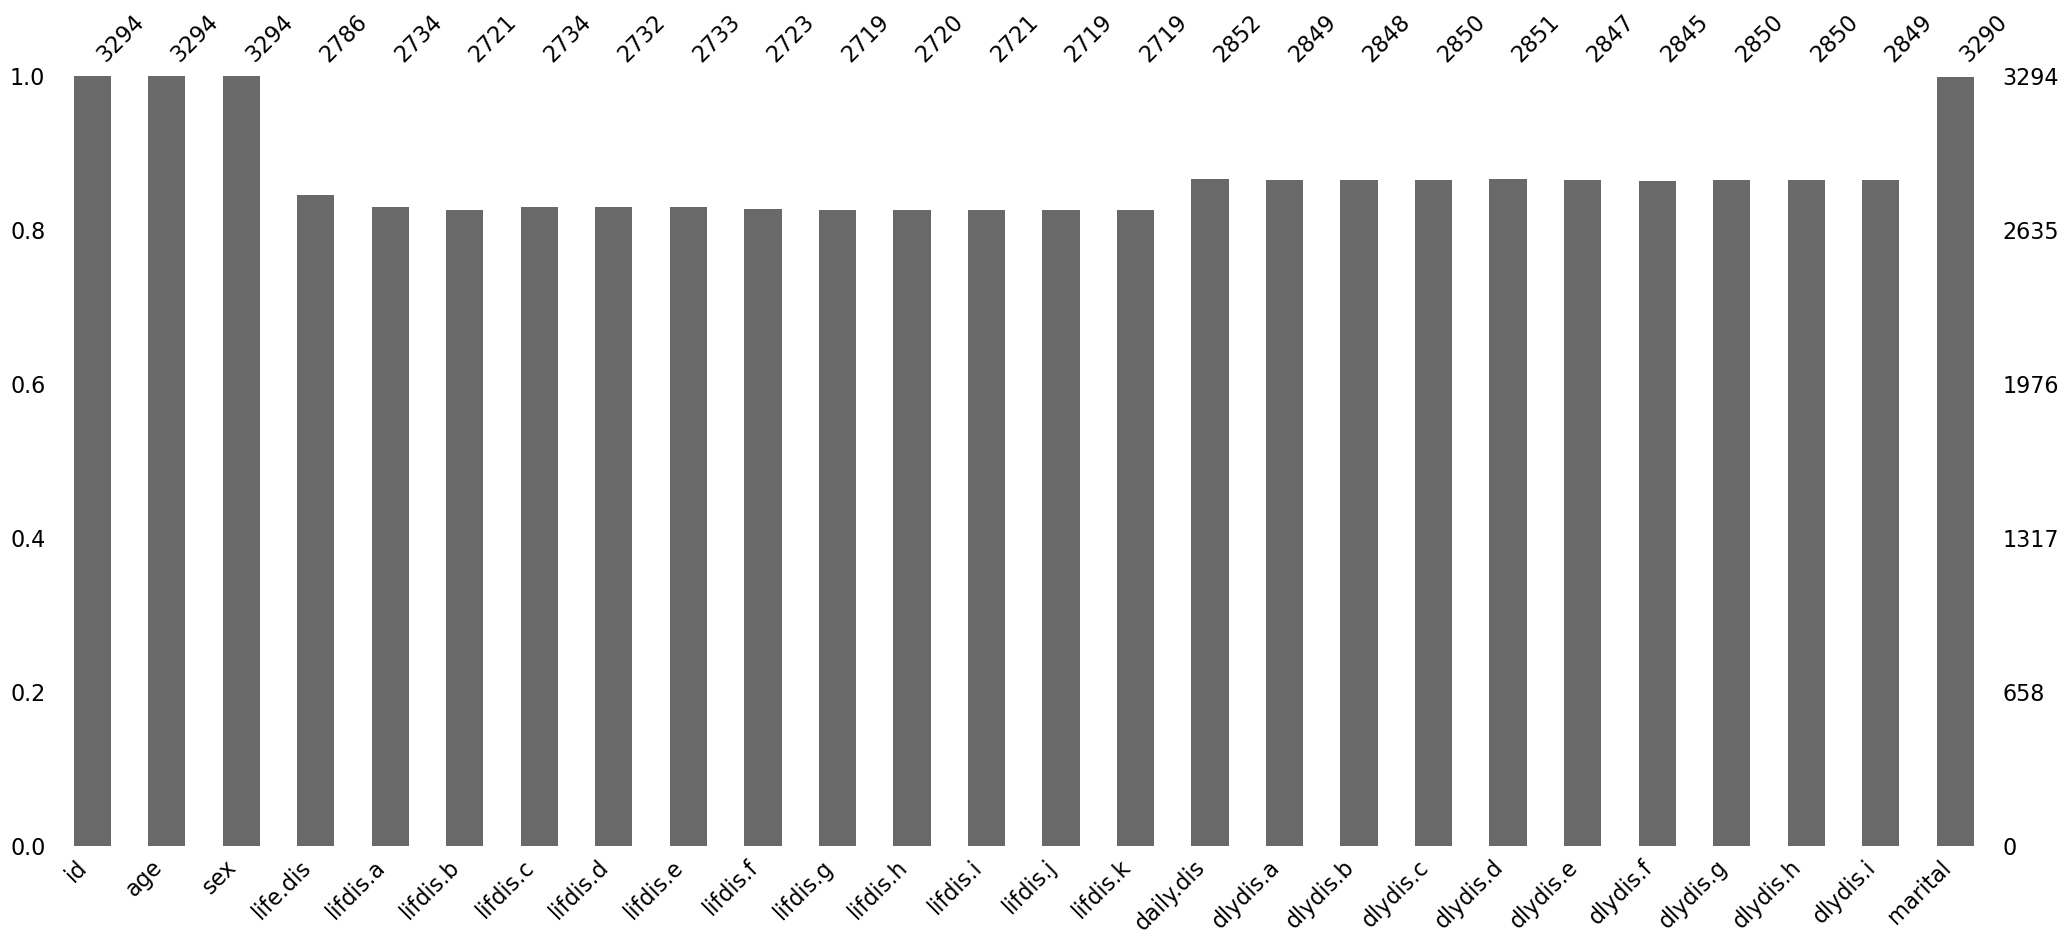

In [ ]:
# USE MISSINGO
msno.bar(df_required)

<Axes: >

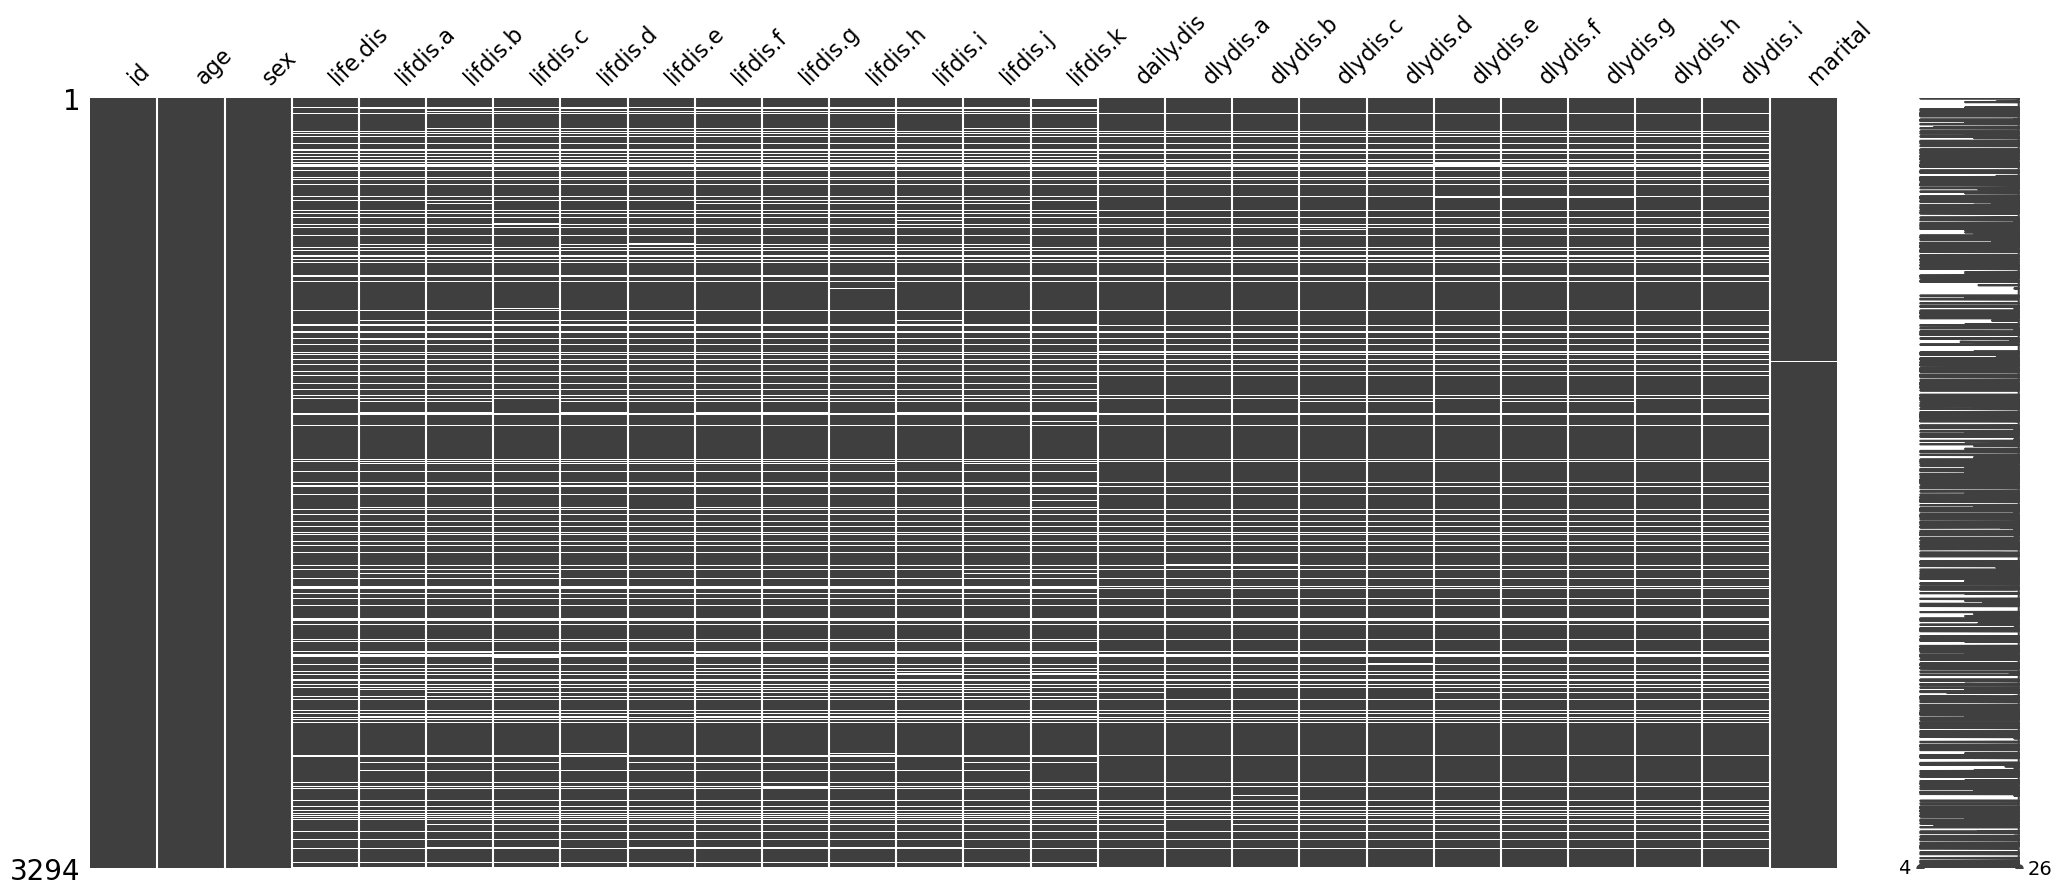

In [ ]:
# Matrix chart
msno.matrix(df_required)

<Axes: >

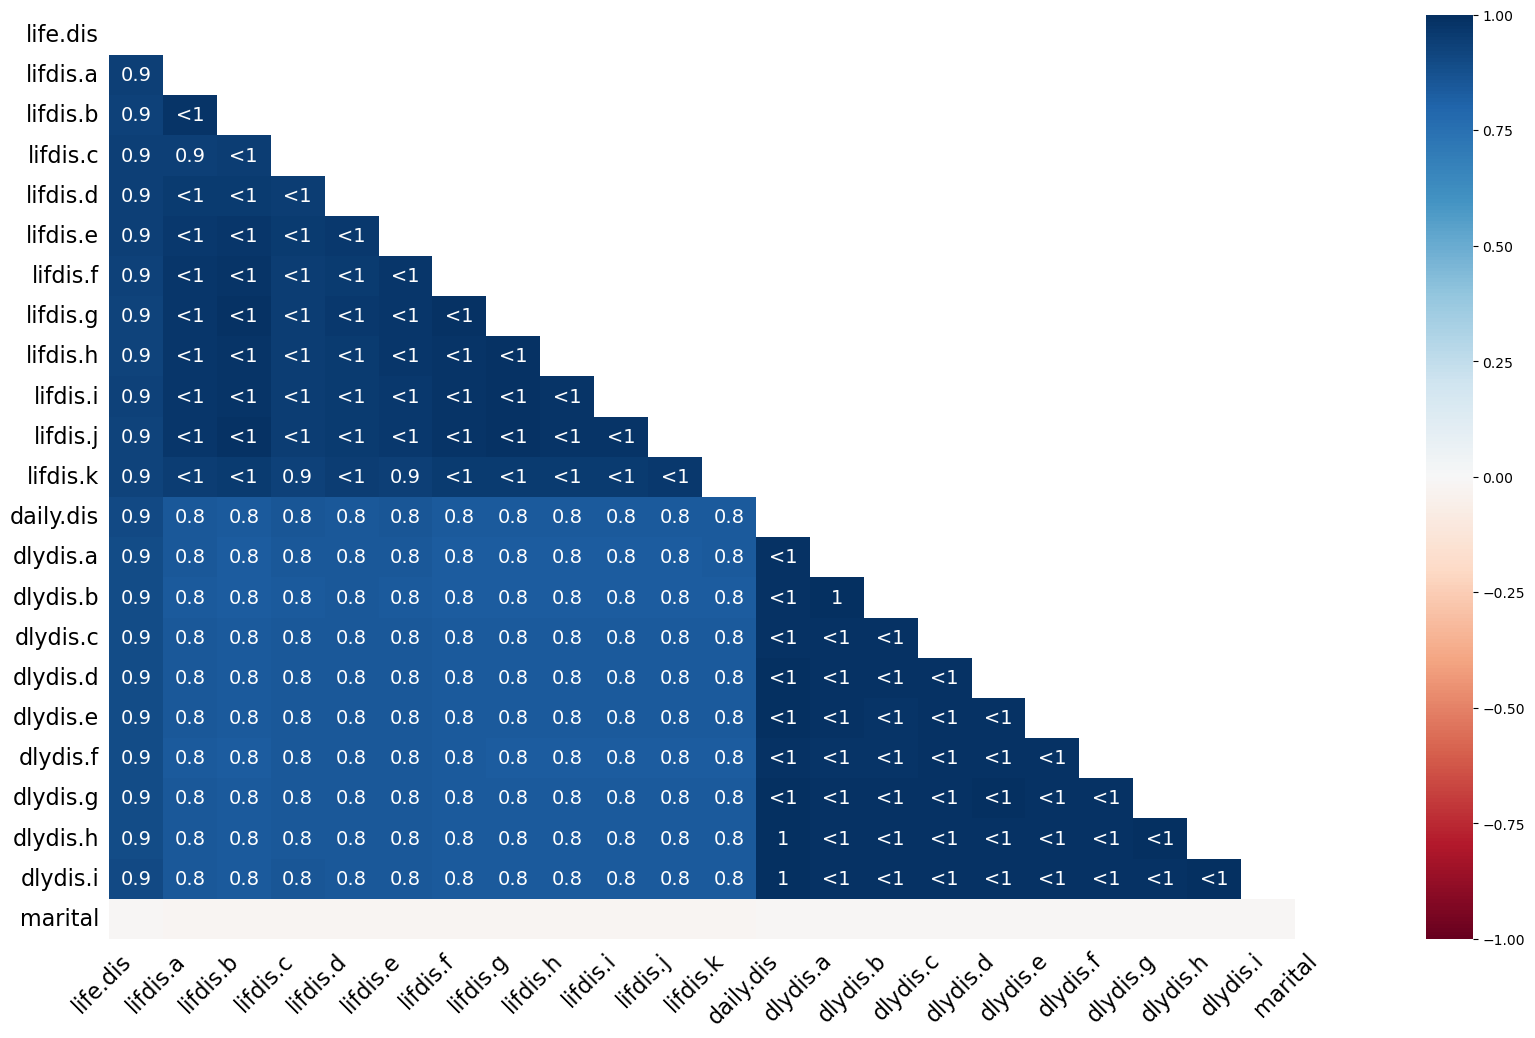

In [ ]:
#Heatmap
msno.heatmap(df_required)

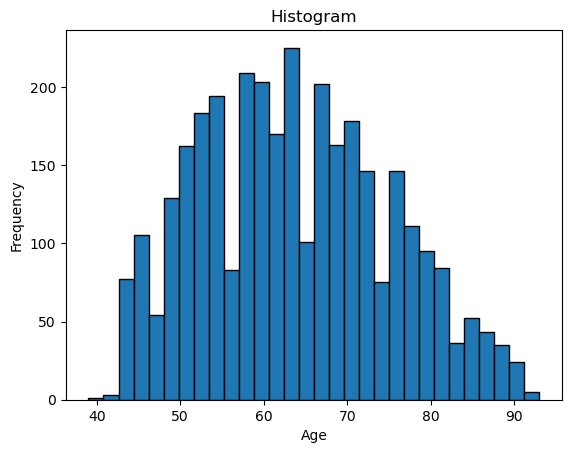

In [ ]:

# Create the histogram
plt.hist(df_required['age'], bins=30, edgecolor='black')

# Add a title and labels
plt.title("Histogram")
plt.xlabel("Age")
plt.ylabel("Frequency")

# Show the plot
plt.show()


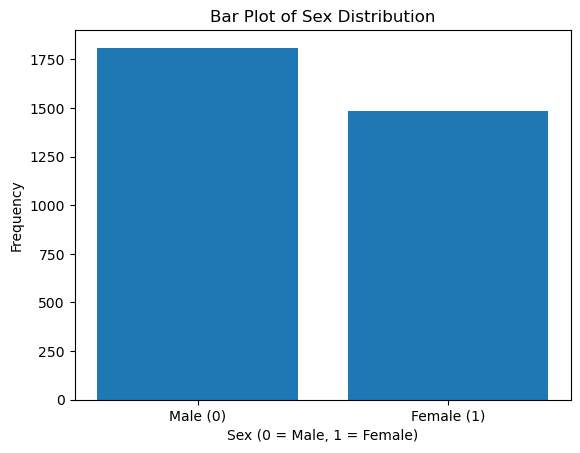

In [ ]:

# Recode 'sex' column (1 -> 0, 2 -> 1)
df_required['sex'] = df_required['sex'].replace({1: 0, 2: 1})

# Create a bar plot
plt.bar(df_required['sex'].value_counts().index, df_required['sex'].value_counts().values, tick_label=["Male (0)", "Female (1)"])

# Add labels and title
plt.xlabel("Sex (0 = Male, 1 = Female)")
plt.ylabel("Frequency")
plt.title("Bar Plot of Sex Distribution")

# Show plot
plt.show()


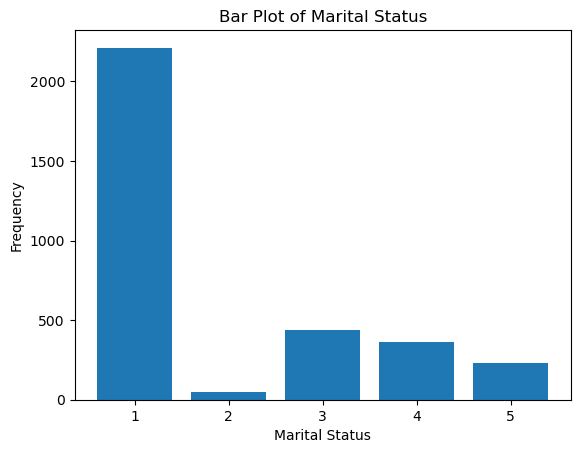

In [ ]:

# Count occurrences of each marital status
marital_status_counts = df_required['marital'].value_counts().sort_index()

# Define category labels
labels = ["1 = Married", "2 = Separated", "3 = Divorced", "4 = Widowed", "5 = Never Married"]

# Create bar plot
plt.bar(marital_status_counts.index, marital_status_counts.values, tick_label=[1, 2, 3, 4, 5])

# Add labels and title
plt.xlabel("Marital Status")
plt.ylabel("Frequency")
plt.title("Bar Plot of Marital Status")

# Show plot
plt.show()
